In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

Cabeçalho: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Resumo Estatístico:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000      

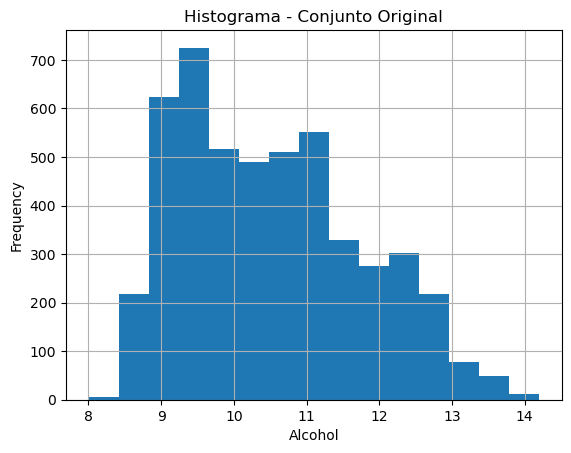

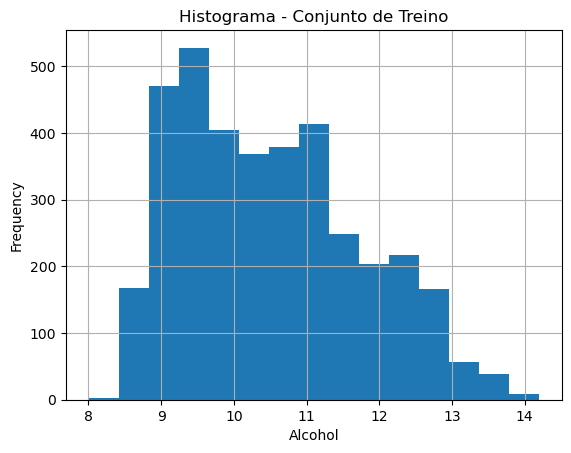

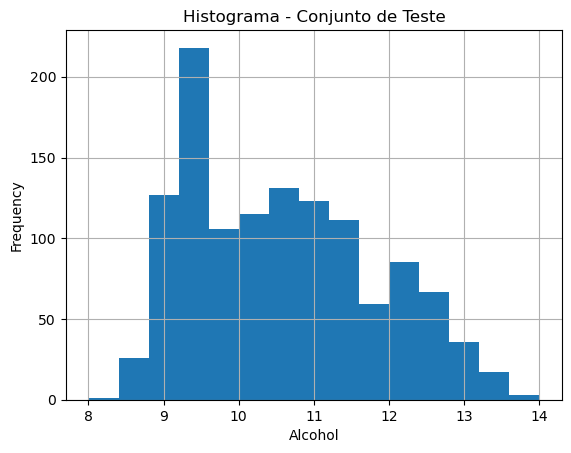

In [3]:
# 1. Carregar os dados do CSV
df = pd.read_csv("winequality-white.csv", sep=';')

# 2. Exibir cabeçalhos de colunas e resumo estatístico
print("Cabeçalho:", df.columns)
print("\nResumo Estatístico:")
print(df.describe())

# 3. Remover a coluna 'quality'
df = df.drop(columns=['quality'])

# 4. Dividir os dados em conjuntos de treinamento e teste
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# 5. Salvar os conjuntos de treinamento e teste em arquivos CSV
train_df.to_csv("Treino3.csv", index=False)
test_df.to_csv("Teste3.csv", index=False)

# 6. Plotar histogramas
def plot_histogram(df, title):
    df['alcohol'].hist(bins=15)
    plt.title(title)
    plt.xlabel('Alcohol')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df, 'Histograma - Conjunto Original')
plot_histogram(train_df, 'Histograma - Conjunto de Treino')
plot_histogram(test_df, 'Histograma - Conjunto de Teste')

In [6]:
# Funções para plotar gráficos
def plot_graphs(y_test, y_pred, residuals):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.hist(residuals, bins=30)
    plt.title('Histograma dos Resíduos')

    plt.subplot(2, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.title('Resíduos vs Valores Previstos')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, y_pred)
    plt.title('Valores Reais vs Valores Previstos')
    plt.xlabel('Real')
    plt.ylabel('Previsto')

    plt.subplot(2, 2, 4)
    plt.plot(y_test.reset_index(drop=True), label='Real')
    plt.plot(y_pred, label='Previsto')
    plt.title('Comparação de Valores Reais e Previstos')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 1. Pré-processamento e Normalização
train_df = pd.read_csv('Treino.csv')
test_df = pd.read_csv('Teste.csv')

scaler = StandardScaler()
X_train = scaler.fit_transform(train_df.drop(columns=['alcohol']))
X_test = scaler.transform(test_df.drop(columns=['alcohol']))
y_train = train_df['alcohol']
y_test = test_df['alcohol']

# 2. Treinamento e Teste do Modelo OLS
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))

# Resíduos
residuals = y_test - y_pred

plot_graphs(y_test, y_pred, residuals)

# 3. Validação Cruzada e Avaliação de Desempenho
lin_reg = LinearRegression()
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R2
r2 = r2_score(y_test, y_pred)

# Validção Cruzada - RMSE e R2
rmse_scores_5 = np.sqrt(-cross_val_score(lin_reg, sm.add_constant(X_train), y_train, cv=kf_5, scoring='neg_mean_squared_error'))
r2_scores_5 = cross_val_score(lin_reg, sm.add_constant(X_train), y_train, cv=kf_5, scoring='r2')
rmse_scores_10 = np.sqrt(-cross_val_score(lin_reg, sm.add_constant(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error'))
r2_scores_10 = cross_val_score(lin_reg, sm.add_constant(X_train), y_train, cv=kf_10, scoring='r2')

print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"Média RMSE (Validação Cruzada 5 dobras): {rmse_scores_5.mean():.4f}")
print(f"Média R2 (Validação Cruzada 5 dobras): {r2_scores_5.mean():.4f}")
print(f"Média RMSE (Validação Cruzada 10 dobras): {rmse_scores_10.mean():.4f}")
print(f"Média R2 (Validação Cruzada 10 dobras): {r2_scores_10.mean():.4f}")

# Aqui, você pode adicionar códigos para plotar RMSE e R2 para cada dobra da validação cruzada.

KeyError: "['alcohol'] not found in axis"